In [10]:
import pandas as pd
import numpy as np
import os

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
movies = pd.read_csv('Join_TMDB_Filtered.csv')

In [18]:
movies.columns

Index(['movieId', 'title', 'genres', 'release_year', 'Adventure', 'Animation',
       'Children', 'Comedy', 'Fantasy', 'Romance', 'Drama', 'Action', 'Crime',
       'Thriller', 'Horror', 'Mystery', 'Sci-Fi', 'IMAX', 'Documentary', 'War',
       'Musical', 'Western', 'Film-Noir', '(no genres listed)',
       'movielens_number_reviews', 'movielens_avg_rating', 'imdbId', 'tmdbId',
       'tmdb_info', 'tmdb_cast'],
      dtype='object')

In [19]:
movies.head()

,movieId,title,genres,release_year,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Mystery,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir,(no genres listed),movielens_number_reviews,movielens_avg_rating,imdbId,tmdbId,tmdb_info,tmdb_cast
0,53207,88 Minutes (2008),"['Crime', 'Drama', 'Mystery', 'Thriller']",2008,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,628,2.935510,411061,3489,"{'adult': False, 'backdrop_path': '/gLU169RfA0...","[{'cast_id': 1, 'character': 'Jack Gramm', 'cr..."
1,55603,My Mom's New Boyfriend (2008),"['Action', 'Comedy', 'Romance', 'Thriller']",2008,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,59,2.923729,780534,9262,"{'adult': False, 'backdrop_path': '/oCbczxmpLM...","[{'cast_id': 11, 'character': 'Marthy Durand',..."
2,55830,Be Kind Rewind (2008),['Comedy'],2008,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1511,3.230642,799934,4953,"{'adult': False, 'backdrop_path': '/4jydtNkMFA...","[{'cast_id': 12, 'character': 'Jerry', 'credit..."
3,56949,27 Dresses (2008),"['Comedy', 'Romance']",2008,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2108,3.170066,988595,6557,"{'adult': False, 'backdrop_path': '/jwV0wmhEqH...","[{'cast_id': 14, 'character': 'Jane Nichols', ..."
4,57326,In the Name of the King: A Dungeon Siege Tale ...,"['Action', 'Adventure', 'Fantasy']",2008,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,241,2.062241,460780,2312,"{'adult': False, 'backdrop_path': '/u14b6vdFie...","[{'cast_id': 13, 'character': 'Farmer', 'credi..."


In [20]:
tmovies = pd.read_csv('tmovies.csv')

In [21]:
tmovies.head()

,Unnamed: 0,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,0,False,/ok6Ws65nDSLAIKkKgIjqyM5OGCc.jpg,NaN,130000000,"[{'id': 28, 'name': 'Action'}, {'id': 9648, 'n...",https://www.warnerbros.com/watchmen,13183,tt0409459,en,Watchmen,In a gritty and alternate 1985 the glory days ...,15.138,/1QqwJBv5a6ddgzaT6cLytJioyrJ.jpg,"[{'id': 4, 'logo_path': '/fycMZt242LVjagMByZOL...","[{'iso_3166_1': 'US', 'name': 'United States o...",2009-03-05,185258983,163.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Justice is coming to all of us. No matter wha...,Watchmen,False,7.2,3918
1,0,False,/mBVyrtzC2aHkPfbN8iKXCwJRaKE.jpg,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,13401,tt0809504,en,The Accidental Husband,When radio love guru Dr Emma Lloyd convinces P...,8.228,/zSO4id9QmEzz0ZV0aRaD7jQwLcC.jpg,"[{'id': 598, 'logo_path': None, 'name': 'Team ...","[{'iso_3166_1': 'IE', 'name': 'Ireland'}, {'is...",2008-02-29,22707064,90.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,The Accidental Husband,False,5.3,249
2,0,False,/pUNlJ6jzDsgUvPjJeFfsyyOSZJx.jpg,NaN,32000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 18, '...",http://www.theroad-movie.com/,20766,tt0898367,en,The Road,A father and his son walk alone through burned...,8.779,/nzw8YGJhWC2scIrXJmyQMy5iw6v.jpg,"[{'id': 7405, 'logo_path': '/cXMoZ75Zu4EoA3fRA...","[{'iso_3166_1': 'US', 'name': 'United States o...",2009-11-25,27635305,111.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,In a moment the world changed forever.,The Road,False,6.9,1497
3,0,False,/f7pTesNnPjOVAq7QqhgnSHaK9Cc.jpg,NaN,30000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",http://www.bridewars.com,10521,tt0901476,en,Bride Wars,Two best friends become rivals when their resp...,6.669,/y5O46J9i98MkcExaPIeZaRImF4C.jpg,"[{'id': 26670, 'logo_path': None, 'name': 'Sun...","[{'iso_3166_1': 'US', 'name': 'United States o...",2009-01-09,114663461,89.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,May the best bride win,Bride Wars,False,6.0,1282
4,0,False,/3ggNo1od6Rs1eJwhU3TkwJi3wbi.jpg,"{'id': 264437, 'name': 'My Bloody Valentine Co...",15000000,"[{'id': 9648, 'name': 'Mystery'}, {'id': 27, '...",http://www.mybloodyvalentinein3d.com/,14435,tt1179891,en,My Bloody Valentine,"Ten years ago, a tragedy changed the town of H...",6.298,/kVR7uUedn4RNEZ3LByvpihhWn3.jpg,"[{'id': 1632, 'logo_path': '/cisLn1YAUuptXVBa0...","[{'iso_3166_1': 'US', 'name': 'United States o...",2009-01-16,102836002,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,He's gonna break your heart.,My Bloody Valentine,False,5.3,433


In [22]:
movies = pd.merge(movies, tmovies, how='left', left_on='tmdbId', right_on='id',  suffixes=('', '_t'))

In [23]:
movies.head()

,movieId,title,genres,release_year,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Mystery,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir,(no genres listed),movielens_number_reviews,movielens_avg_rating,imdbId,tmdbId,tmdb_info,tmdb_cast,Unnamed: 0,adult,backdrop_path,belongs_to_collection,budget,genres_t,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title_t,video,vote_average,vote_count
0,53207,88 Minutes (2008),"['Crime', 'Drama', 'Mystery', 'Thriller']",2008,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,628,2.935510,411061,3489,"{'adult': False, 'backdrop_path': '/gLU169RfA0...","[{'cast_id': 1, 'character': 'Jack Gramm', 'cr...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,55603,My Mom's New Boyfriend (2008),"['Action', 'Comedy', 'Romance', 'Thriller']",2008,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,59,2.923729,780534,9262,"{'adult': False, 'backdrop_path': '/oCbczxmpLM...","[{'cast_id': 11, 'character': 'Marthy Durand',...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,55830,Be Kind Rewind (2008),['Comedy'],2008,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1511,3.230642,799934,4953,"{'adult': False, 'backdrop_path': '/4jydtNkMFA...","[{'cast_id': 12, 'character': 'Jerry', 'credit...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,56949,27 Dresses (2008),"['Comedy', 'Romance']",2008,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2108,3.170066,988595,6557,"{'adult': False, 'backdrop_path': '/jwV0wmhEqH...","[{'cast_id': 14, 'character': 'Jane Nichols', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,57326,In the Name of the King: A Dungeon Siege Tale ...,"['Action', 'Adventure', 'Fantasy']",2008,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,241,2.062241,460780,2312,"{'adult': False, 'backdrop_path': '/u14b6vdFie...","[{'cast_id': 13, 'character': 'Farmer', 'credi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
pd.set_option('display.max_columns', None)

# Datetime

In [25]:
movies['release_date'] = pd.to_datetime(movies['release_date'])
movies['year'] = movies.release_date.dt.year
movies['month'] = movies.release_date.dt.month
movies['dow'] = movies.release_date.dt.weekday
movies['qtr'] = movies.release_date.dt.quarter

In [44]:
movies['qtr'] = movies['qtr'].astype('str')

# Revenue, Budget, Profit and Loss

In [26]:
movies['pl'] = movies['revenue'] - movies['budget']

In [27]:
#exclude movies with 0 budgets
movies_1 = movies[movies['budget'] > 0]


Distributions for both revenue and budget appear heavily right skewed, with most movies costing and making no money at all

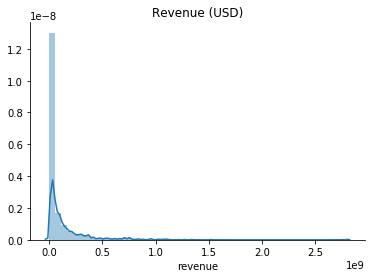

In [28]:
sns.distplot(movies_1['revenue']).set_title('Revenue (USD)')
sns.despine()


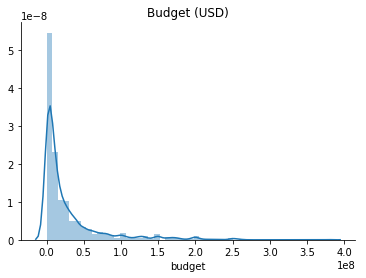

In [29]:
sns.distplot(movies_1['budget']).set_title('Budget (USD)')
sns.despine()

In general, total revenues appear to be far higher than budgets

Text(0.5,0,'Release year')

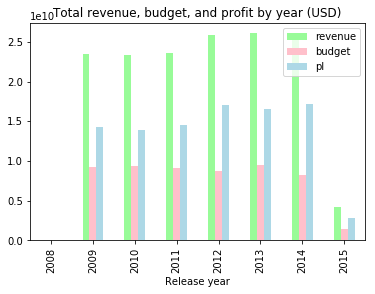

In [53]:

movies.groupby('release_year')['revenue', 'budget', 'pl'].sum().sort_index(ascending=True).plot(kind='bar', color=['palegreen', 'pink', 'lightblue'])
plt.title('Total revenue, budget, and profit by year (USD)')
plt.xlabel('Release year')


The average movie appears to make more than its budget

Text(0.5,0,'Release year')

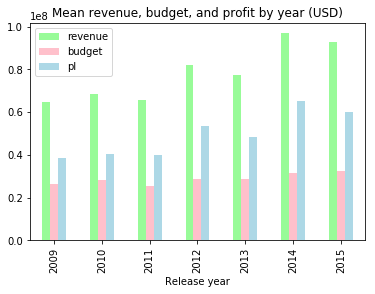

In [54]:
ax = movies_1.groupby('release_year')['revenue', 'budget', 'pl'].agg(np.mean).sort_index(ascending=True).plot(kind='bar', color=['palegreen', 'pink', 'lightblue'])
plt.title('Mean revenue, budget, and profit by year (USD)')
plt.xlabel('Release year')


However, this hides the issue that the mean is heavily affected by outliers. Strangely, the median profit appears to be quite unrelated to the median revenue and budget

Text(0.5,0,'Release year')

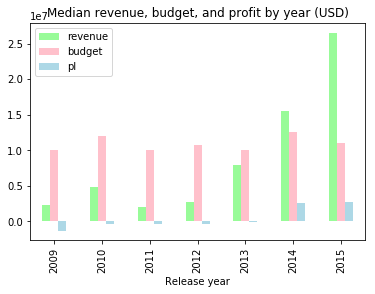

In [55]:
ax = movies_1.groupby('release_year')['revenue', 'budget', 'pl'].agg(np.median).sort_index(ascending=True).plot(kind='bar', color=['palegreen', 'pink', 'lightblue'])
plt.title('Median revenue, budget, and profit by year (USD)')
plt.xlabel('Release year')


In general, we see that revenues, budgets and profits are higher for quarters 2 and 3, Summer and Winter, the traditional holiday and blockbuster periods.


Text(0.5,0,'Quarter')

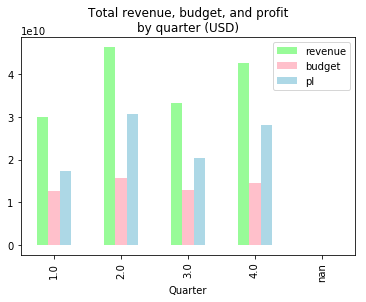

In [57]:

movies.groupby('qtr')['revenue', 'budget', 'pl'].sum().sort_index(ascending=True).plot(kind='bar', color=['palegreen', 'pink', 'lightblue'])
plt.title('Total revenue, budget, and profit\nby quarter (USD)')
plt.xlabel('Quarter')